## SVM

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# データ準備
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# PCA
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

c:\Users\ytchi\anaconda3\envs\py37\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
# 学習
from sklearn.svm import SVC
model = SVC(kernel='poly', C=100)
model.fit(X_train_pc, y_train)

SVC(C=100, kernel='poly')

In [32]:
# 予測
y_pred = model.predict(X_test_pc)
# 評価
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

In [33]:
# サポートベクトル
model.support_vectors_[:10]

array([[-2.01808086, -2.16076222],
       [-1.83691058,  0.22264198],
       [-0.33739989, -2.59040494],
       [ 1.01841242,  0.75406273],
       [ 0.00304253, -0.16979486],
       [ 1.14259734,  0.50582016],
       [-0.59799672, -1.47307272],
       [ 1.00108719, -1.69126085],
       [ 0.76807504,  0.17465618],
       [ 0.78292811,  0.42709078]])

### 決定境界とサポートベクトルの可視化

In [34]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

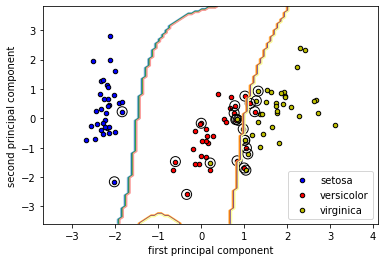

In [35]:
# 決定境界描画
DecisionBoundaryDisplay.from_estimator(model, 
                                       X_train_pc,
                                       plot_method='contour',
                                       cmap=plt.cm.Paired,
                                       xlabel='first principal component',
                                       ylabel='second principal component')

# (PCA後の)学習データ描画
for class_, color in zip(model.classes_, 'bry'):
    # species が class_ であるデータの idx を抽出
    idx = np.where(y_train == class_)
    # idx 番目のデータについて散布図を描画
    plt.scatter(X_train_pc[idx, 0], 
                X_train_pc[idx, 1], 
                c=color, 
                label=class_,
                edgecolors='black', 
                s=20)

# サポートベクトル描画
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1],
            s=100, 
            facecolor='none', 
            linewidths=1, 
            edgecolors='black')
plt.legend()